# Decision Tree
## Problem->Titanic Survior prediction


In [33]:
import numpy as np
import pandas as pd


In [34]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DecisionTree/Titanic Survival Prediction/train.csv')

In [35]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
#droping the irrelevent features
columns_to_drop=["PassengerId","Name","Ticket","Cabin","Embarked"]

In [38]:
data=data.drop(columns_to_drop,axis=1)

In [39]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [40]:
# converting the data into neumeric form applying in sex column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Sex"]=le.fit_transform(data["Sex"])


In [41]:
print(data.head())
print(data.info())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    1  22.0      1      0   7.2500
1         1       1    0  38.0      1      0  71.2833
2         1       3    0  26.0      0      0   7.9250
3         1       1    0  35.0      1      0  53.1000
4         0       3    1  35.0      0      0   8.0500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
None


In [42]:
data=data.fillna(data["Age"].mean())
# we can also us imputer from the sklearn

In [43]:
input_cols=['Pclass','Age','SibSp','Parch','Fare','Sex']
output_cols=["Survived"]

x=data[input_cols]
y=data[output_cols]

print(x.shape,y.shape)

(891, 6) (891, 1)


In [44]:
 #define Entropy and Information gain


In [45]:
#function to find the entropy
def entropy(col):
  counts=np.unique(col,return_counts=True)
  N=float (col.shape[0])
  # print(counts)
  ent=0.0
  for ix in counts[1]:
    p=ix/N
    ent+=(-1.0*p*np.log2(p))
  return ent

In [46]:
#testing
col=np.array([1,1,0,0,1,0])
entropy(col)

1.0

In [47]:
def divide_data(x_data, fkey, fval):
    x_left = pd.DataFrame([], columns=x_data.columns)
    x_right = pd.DataFrame([], columns=x_data.columns)

    for ix in range(x_data.shape[0]):
        val = x_data.loc[ix, fkey]

        if val > fval:
            x_right = x_right.append(x_data.loc[ix])
        else:
            x_left = x_left.append(x_data.loc[ix])

    return x_left, x_right


In [48]:
import math

def entropy(col):
    counts = col.value_counts()
    entropy_val = 0
    total = len(col)

    for count in counts:
        prob = count / total
        entropy_val += (-prob) * math.log2(prob)

    return entropy_val

def information_gain(data, feature, split_value):
    df_below = data[data[feature] <= split_value]
    df_above = data[data[feature] > split_value]

    entropy_before_split = entropy(data['Survived'])
    entropy_below = entropy(df_below['Survived'])
    entropy_above = entropy(df_above['Survived'])

    weight_below = len(df_below) / len(data)
    weight_above = len(df_above) / len(data)

    info_gain = entropy_before_split - (weight_below * entropy_below) - (weight_above * entropy_above)

    return info_gain




In [49]:
# Calculate information gain for Pclass
pclass_mean = data['Pclass'].mean()
info_gain_pclass = information_gain(data, 'Pclass', pclass_mean)

Age_mean = data['Age'].mean()
info_gain_age = information_gain(data, 'Age', Age_mean)

Sex_mean = data['Sex'].mean()
info_gain_sex = information_gain(data, 'Sex', Sex_mean)

Sex_mean = data['Sex'].mean()
info_gain_sex = information_gain(data, 'Sex', Sex_mean)

SibSp_mean = data['SibSp'].mean()
info_gain_SibSp= information_gain(data, 'SibSp', SibSp_mean)

Parch_mean = data['Parch'].mean()
info_gain_Parch= information_gain(data, 'Parch', Parch_mean)

Fare_mean = data['Fare'].mean()
info_gain_Fare= information_gain(data, 'Fare', Fare_mean)

print("Information Gain for Pclass:", info_gain_pclass)
print("Information Gain for age:", info_gain_age)
print("Information Gain for sex:", info_gain_sex)
print("Information Gain for SibSp:", info_gain_SibSp)
print("Information Gain for Parch:", info_gain_Parch)
print("Information Gain for Fare:", info_gain_Fare)

Information Gain for Pclass: 0.07579362743608165
Information Gain for age: 0.0008836151229467681
Information Gain for sex: 0.2176601066606143
Information Gain for SibSp: 0.009584541813400127
Information Gain for Parch: 0.015380754493137666
Information Gain for Fare: 0.04214069283899541


Decsion Tree using SKlearn

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [51]:
sk_tree=DecisionTreeClassifier(criterion='entropy')


In [52]:
sk_tree.fit(data[input_cols],data[output_cols])

DecisionTreeClassifier(criterion='entropy')

In [53]:
sk_tree.predict(data[input_cols])

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [54]:
sk_tree.score(data[input_cols],data[output_cols])

0.9820426487093153

Visualize a Decison Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO
dot_data = StringIO()
export_graphviz(sk_tree, out_file=dot_data, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


Output hidden; open in https://colab.research.google.com to view.

## Random Forests

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [65]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)

In [66]:
rf.fit(x,y)

<ipython-input-66-e151f561c6a5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x,y)


RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)

In [67]:
rf.score(x,y)

0.8439955106621774

In [70]:
#cross validation
acc=cross_val_score(RandomForestClassifier(n_estimators=10,max_depth=5,criterion='entropy'),x,y,cv=5).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [71]:
acc

0.8226790534178645

In [74]:
acc_list=[]
for i in range(1,50):
  acc=cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5),x,y,cv=5)
  acc_list.append(acc)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [75]:
print(acc_list)

[array([0.66480447, 0.7247191 , 0.81460674, 0.75842697, 0.80898876]), array([0.72625698, 0.79213483, 0.79775281, 0.76966292, 0.71910112]), array([0.79888268, 0.81460674, 0.8258427 , 0.79213483, 0.80898876]), array([0.69832402, 0.81460674, 0.82022472, 0.80337079, 0.84831461]), array([0.75977654, 0.82022472, 0.80337079, 0.80337079, 0.81460674]), array([0.79888268, 0.80898876, 0.83707865, 0.79775281, 0.84831461]), array([0.75977654, 0.80898876, 0.80898876, 0.78651685, 0.84831461]), array([0.7150838 , 0.80337079, 0.82022472, 0.79213483, 0.84831461]), array([0.81005587, 0.82022472, 0.83707865, 0.81460674, 0.83146067]), array([0.79888268, 0.80898876, 0.80898876, 0.79213483, 0.82022472]), array([0.72625698, 0.79775281, 0.86516854, 0.79775281, 0.83707865]), array([0.79329609, 0.80898876, 0.83707865, 0.79775281, 0.83707865]), array([0.76536313, 0.82022472, 0.8258427 , 0.81460674, 0.84831461]), array([0.74301676, 0.80898876, 0.84831461, 0.79213483, 0.84269663]), array([0.77653631, 0.79775281, 0.

<ipython-input-77-1171690be437>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


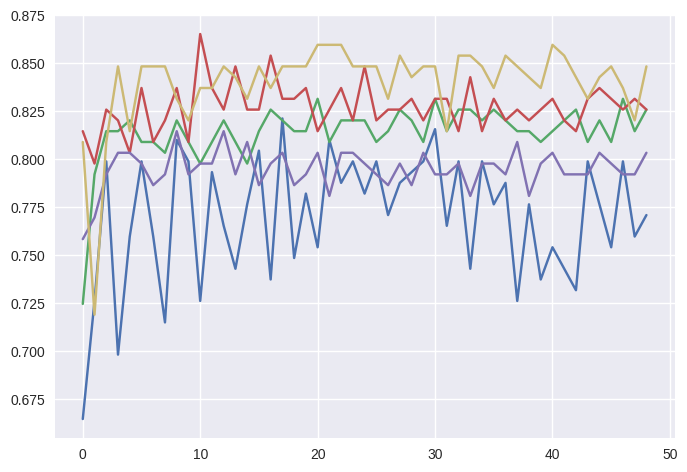

In [77]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(acc_list)

In [78]:
print(np.argmax(acc_list)) #it will give more accuracy

52
